<a href="https://colab.research.google.com/github/solita/a-ice/blob/main/notebooks/SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/A-ICE/Data/AIS+ICE/winter_dataset.csv')

In [ ]:
def mean_error(y_test, pred):
    return np.mean(np.abs(pred-y_test))

In [ ]:
errors = []
importance = []
mmsis = df.mmsi.unique()
for mmsi in mmsis:
    train_set = df.loc[df.mmsi==mmsi]
    test_set = df.loc[df.mmsi!=mmsi]
    x_train = train_set[['wind_hailuoto','temperature_hailuoto', 'ice_thickness', 'ice_concentration']]
    x_test = test_set[['wind_hailuoto', 'temperature_hailuoto', 'ice_thickness', 'ice_concentration']]
    y_train = train_set['speed']
    y_test = test_set['speed']
    y_train = np.ravel(y_train)
    model = RandomForestRegressor()
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    errors.append([mean_error(y_test,prediction)])
    importance.append(model.feature_importances_)



In [ ]:
print(errors)

In [ ]:
print(importance)

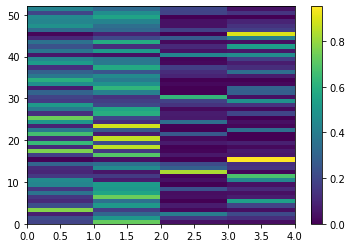

In [ ]:
import matplotlib.pyplot as plt

plt.pcolormesh(importance)
plt.colorbar()

In [ ]:
pip install shap

     |████████████████████████████████| 358kB 28.3MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491622 sha256=2ca1b20618c5cda3bea398536446c2939941bf033170da3ee587580265d97d37
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
import shap

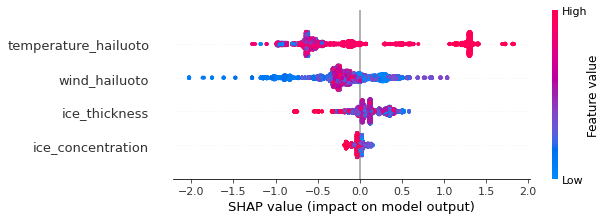

In [ ]:
# explain all the predictions in the test set
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)


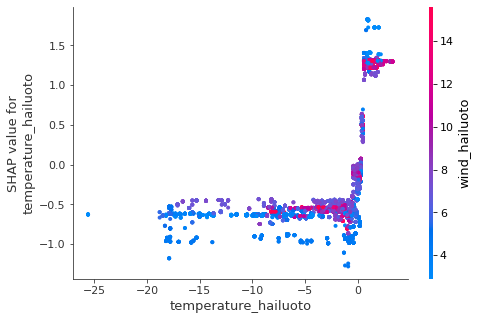

In [ ]:
shap.dependence_plot("temperature_hailuoto", shap_values, x_test)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x_test)
#This plot doesn't show on Github

shap.plots.force is slow for many thousands of rows, try subsampling your data.
